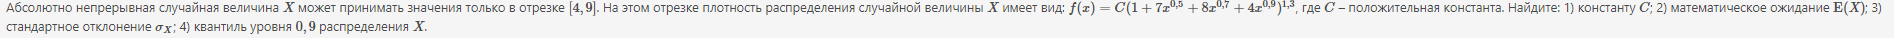

In [84]:
import numpy as np
import scipy.integrate as integrate
from scipy.optimize import fsolve

a, b = 4,9
def pdf_f(x):
    return (1+7*x**0.5+8*x**0.7+4*x**0.9)**1.3

integrall, _ = integrate.quad(pdf_f, a, b)
c = 1/integrall
print(np.round(c,6))

def pdf_f_c(x):
    return c*((1+7*x**0.5+8*x**0.7+4*x**0.9)**1.3)

e_x, _ = integrate.quad(lambda x: x*pdf_f_c(x), a, b)
print(np.round(e_x,3))

e_x2, _ = integrate.quad(lambda x: x**2*pdf_f_c(x), a, b)

var = e_x2 - e_x**2
sigma = np.sqrt(var)
print(np.round(sigma,3))

def cdf(x):
    return integrate.quad(pdf_f_c, a, x)[0]

q = fsolve(lambda x: cdf(x) - 0.9, 7) 
print(np.round(q,3))



0.000799
6.793
1.413
[8.622]


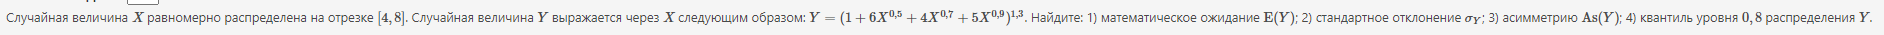

In [89]:
import numpy as np
import scipy.stats as stats
from scipy.integrate import quad
#Параметры 
a, b = 4, 8
xDist = stats.uniform(a, b-a)

def y(x):
    return(1+6*x**0.5 + 4*x**0.7 + 5*x**0.9)**1.3
#1
def integrated_e(x):
    return y(x) * xDist.pdf(x)

e_y, _ = quad(integrated_e, a, b)
print(np.round(e_y, 1))

#2
def integrated_var(x):
    return ((y(x)-e_y)**2)*xDist.pdf(x)

var, _ = quad(integrated_var, a, b)
sigma = np.sqrt(var)
print(np.round(sigma,2))


#3
def integrated_asim(x):
    return (((y(x) - e_y)/sigma)**3) * xDist.pdf(x)

asim, _ = quad(integrated_asim, a, b)
print(np.round(asim,4))

#4
def inverse_cdf_p(p):
    return 4*p + 4

def quantile(p):
    x_cdf = inverse_cdf_p(p)
    return y(x_cdf)

q = 0.8
quantile_y = quantile(q)
print(np.round(quantile_y,4))



182.1
33.06
-0.0016
216.4527


In [92]:
import numpy as np
from scipy.stats import multivariate_normal
from scipy.integrate import dblquad

# Задаем параметры
mu = [-8, 16]
sigma = [[49, 0.8], [0.8, 1]]

# Создаем многомерное нормальное распределение
rv = multivariate_normal(mean=mu, cov=sigma)

# Функции для вычисления вероятностей
def integrand1(y, x):
    return rv.pdf([x, y])

def integrand2(y, x):
    return rv.pdf([x, y])

# Вычисляем вероятности
P1, _ = dblquad(integrand1, -np.inf, 3, 7, np.inf)
P2, _ = dblquad(integrand2, 3, np.inf, -np.inf, 7)

# Общая вероятность
P = P1 + P2

# Вывод результата с точностью до 5 знаков после запятой
print(f'P((X-3)(Y-7)<0) = {P:.5f}')



P((X-3)(Y-7)<0) = 0.94196


In [77]:
import numpy as np
from scipy.stats import multivariate_normal
from scipy.integrate import dblquad

# Определение параметров распределения
mu = [-4, 4]
sigma = [[64, -0.31 * np.sqrt(64 * 81)], [-0.31 * np.sqrt(64 * 81), 81]]

# Определение функции плотности вероятности
rv = multivariate_normal(mu, sigma)

# Функция для области интегрирования
def integrand(y, x):
    return rv.pdf([x, y]) * ((x - 8) * (x - 10) * (y - 1) < 0)

# Установка границ интегрирования
x_min, x_max = -np.inf, np.inf
y_min, y_max = -np.inf, np.inf

# Численное интегрирование
prob, error = dblquad(integrand, x_min, x_max, y_min, y_max)

# Вывод результата
print(f"Probability: {prob:.5f}")

Probability: 0.36569


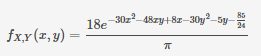

In [103]:
import sympy as sp
from scipy.integrate import dblquad

# Определяем переменные
x, y = sp.symbols('x y')

# Определяем плотность распределения
density = (18 * sp.exp(-30*x**2 - 48*x*y + 8*x - 30*y**2 - 5*y - 85/24)) / sp.pi

# Математическое ожидание X
expectationX = sp.integrate(sp.integrate(x * density, (y, -sp.oo, sp.oo)), (x, -sp.oo, sp.oo))

# Математическое ожидание Y
expectationY = sp.integrate(sp.integrate(y * density, (y, -sp.oo, sp.oo)), (x, -sp.oo, sp.oo))

# Математическое ожидание X^2
expectationX2 = sp.integrate(sp.integrate(x**2 * density, (y, -sp.oo, sp.oo)), (x, -sp.oo, sp.oo))

# Математическое ожидание Y^2
expectationY2 = sp.integrate(sp.integrate(y**2 * density, (y, -sp.oo, sp.oo)), (x, -sp.oo, sp.oo))

# Дисперсия X
varianceX = expectationX2 - expectationX**2

# Дисперсия Y
varianceY = expectationY2 - expectationY**2

# Математическое ожидание XY
expectationXY = sp.integrate(sp.integrate(x * y * density, (y, -sp.oo, sp.oo)), (x, -sp.oo, sp.oo))

# Ковариация X и Y
covarianceXY = expectationXY - expectationX * expectationY

# Коэффициент корреляции
correlationXY = covarianceXY / sp.sqrt(varianceX * varianceY)

print(sp.nsimplify(expectationX), sp.nsimplify(expectationY), sp.nsimplify(varianceX), sp.nsimplify(varianceY), sp.nsimplify(covarianceXY), sp.nsimplify(correlationXY), sep = '\n')

-1/4
1/12
17/192
17/192
-5/64
-15/17
